# 🍷 Wine Quality Prediction using Logistic Regression
## Goal: Predict wine quality (score 0–10) based on physicochemical features.


"""
Wine Quality Dataset used in this project is based on:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis (2009).
"Modeling wine preferences by data mining from physicochemical properties".
Decision Support Systems, 47(4):547-553.
https://doi.org/10.1016/j.dss.2009.05.016

Data obtained from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/wine+quality
"""


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

print("Importations complete.")

Importations complete.


## Data Preprocessing
* Checking for missing values
* Visualizing the data distribution
* Descriptive statistics

In [2]:
df_wqw = pd.read_csv('winequality-white.csv', sep=';')
df_wqw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
#df_wqr = pd.read_csv('winequality-red.csv', sep=';')
#df_wqr.info()

In [4]:
df_wqw.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2131            7.1             0.220         0.32            16.9      0.056   
212             7.0             0.160         0.32             8.3      0.045   
2539            6.2             0.270         0.18             1.5      0.028   
76              7.1             0.180         0.36             1.4      0.043   
4396            7.4             0.270         0.26            11.8      0.053   
2806            7.5             0.170         0.71            11.8      0.038   
4820            5.8             0.360         0.50             1.0      0.127   
193             6.6             0.150         0.34             5.1      0.055   
2741            6.9             0.615         0.42            12.0      0.067   
1286            6.6             0.160         0.29             1.8      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2131                 49.0                 158.0  0.99980  3.37       0.38   
212                  38.0                 126.0  0.99580  3.21       0.34   
2539                 20.0                 111.0  0.99228  3.41       0.50   
76                   31.0                  87.0  0.98980  3.26       0.37   
4396                 55.0                 173.0  0.99699  3.11       0.60   
2806                 52.0                 148.0  0.99801  3.03       0.46   
4820                 63.0                 178.0  0.99212  3.10       0.45   
193                  34.0                 125.0  0.99420  3.36       0.42   
2741                 24.0                 131.0  0.99727  3.19       0.34   
1286                 40.0                 147.0  0.99120  3.06       0.44   

      alcohol  quality  
2131      9.6        6  
212       9.2        5  
2539     10.0        5  
76       12.7        7  
4396      9.8        5  
2806      8.9        5  
4820      9.7        5  
193       9.6        5  
2741      9.3        5  
1286     11.4        7

In [5]:
df_wqw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

## Exploratory Data Analysis (EDA)
* Visualizing the distribution of wine quality scores
* Visualizing the correlation matrix
* Visualizing Pairplots / Boxplots / Histograms of physicochemical features against wine quality

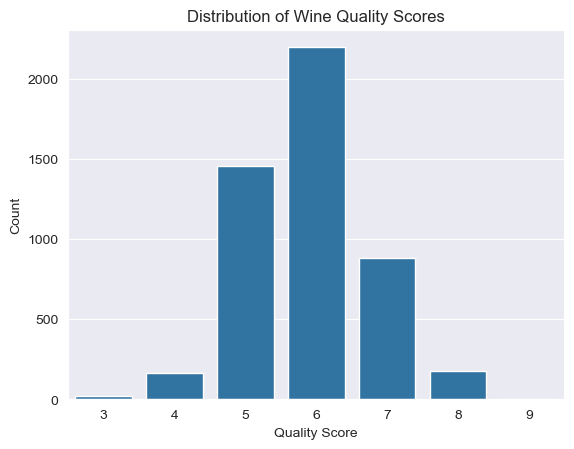

In [6]:
sns.countplot(x='quality', data=df_wqw)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

#### Here we can observe that there are almost none of wines with a Quality score of 9 and barely some with the Score of 3

<Axes: >

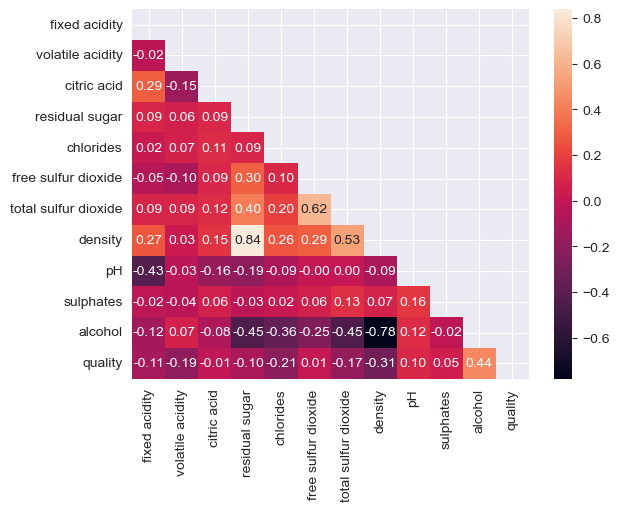

In [7]:
sns.heatmap(df_wqw.corr(), annot=True, fmt='.2f', mask=np.triu(df_wqw.corr()))

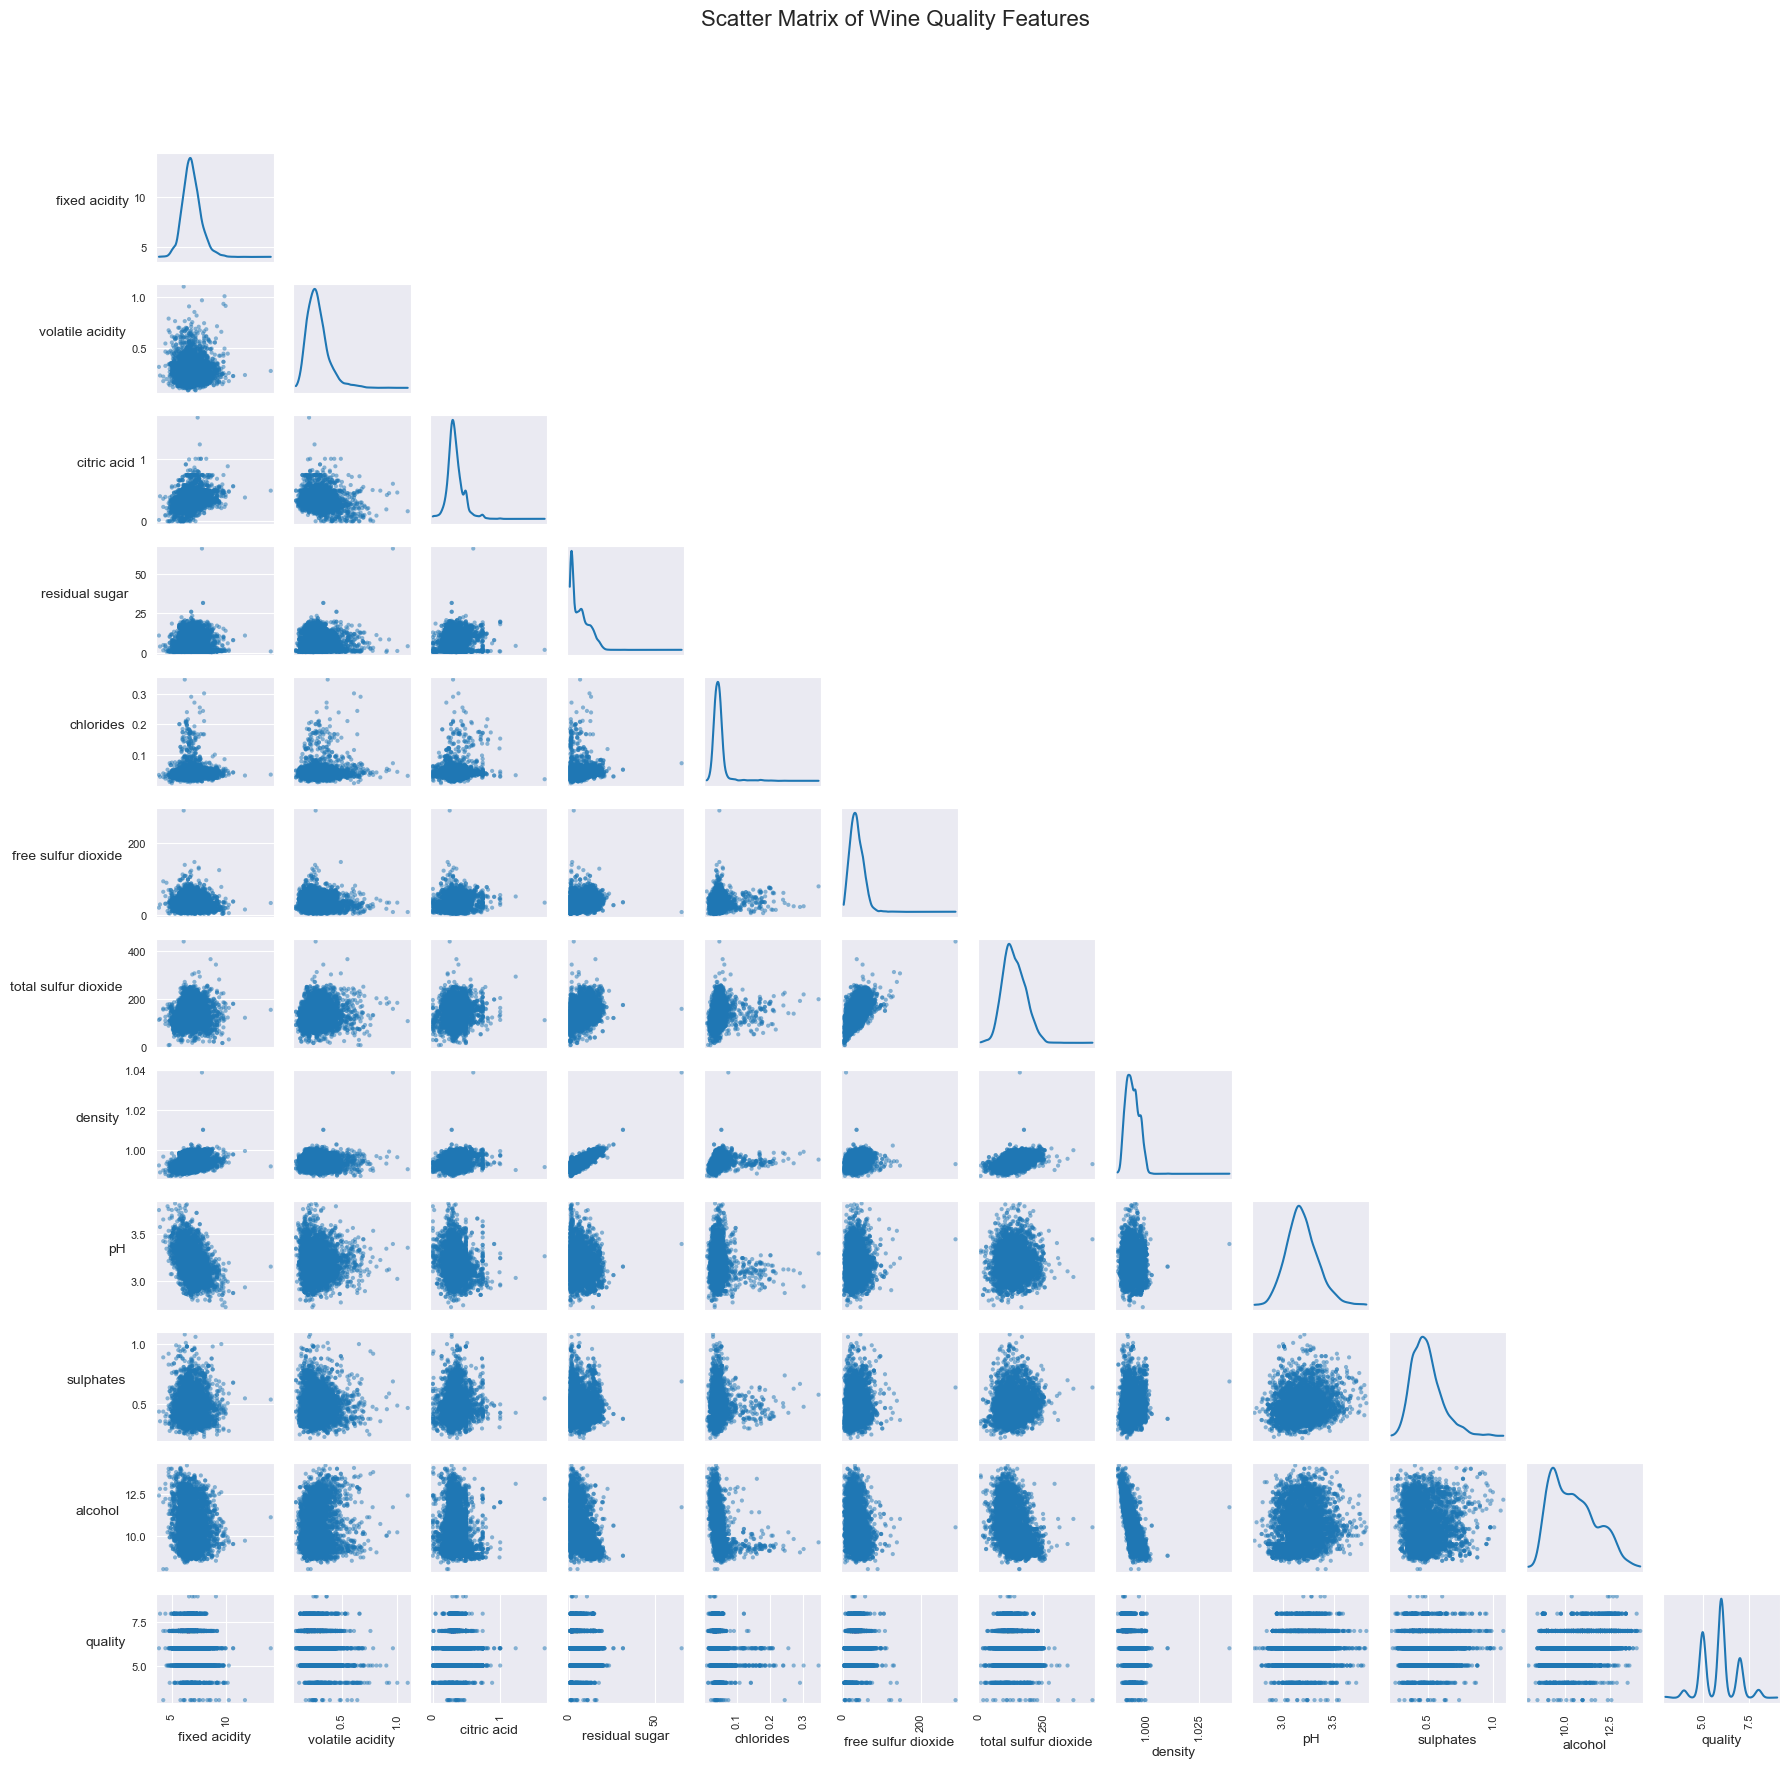

In [8]:
axes = pd.plotting.scatter_matrix(df_wqw, figsize=(18, 18), diagonal='kde', alpha=0.5)
plt.suptitle('Scatter Matrix of Wine Quality Features', fontsize=16)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.yaxis.label.set_position((0,0.5))
plt.tight_layout()
plt.subplots_adjust(top=0.9) # Adjust the top to make room for the title
for i in range (np.shape(axes)[0]):
    for j in range (np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)
plt.show()

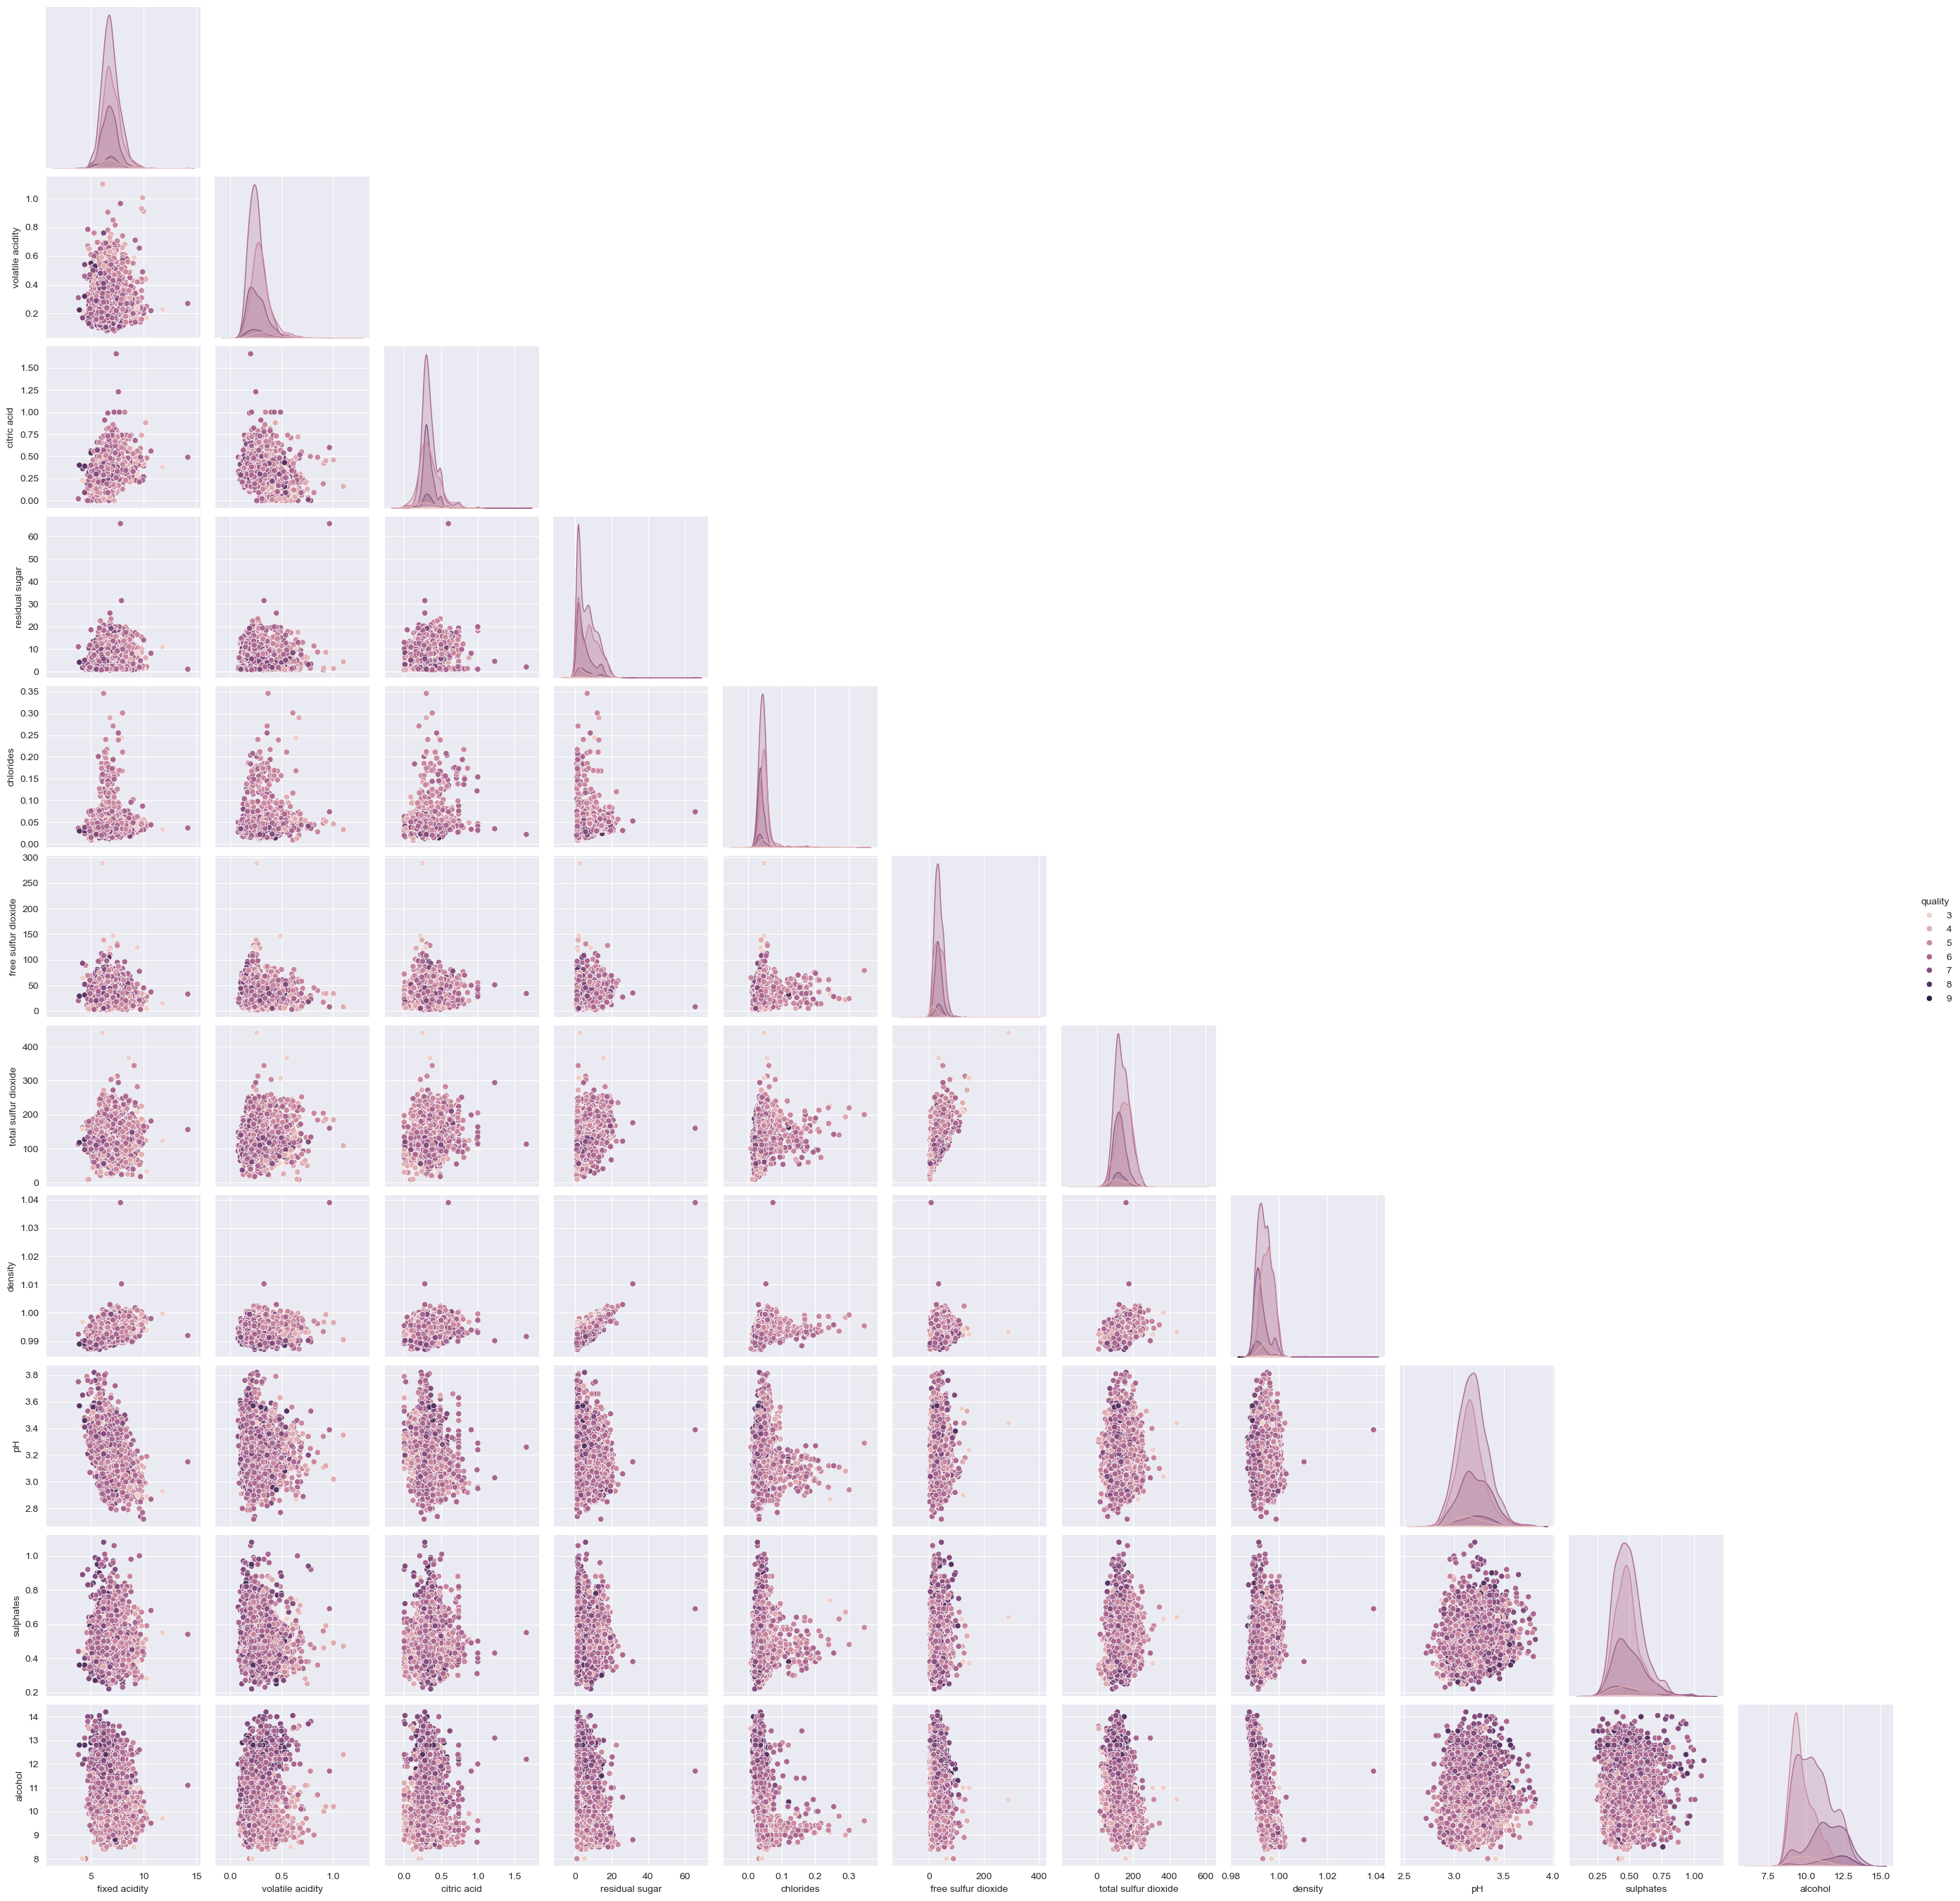

In [9]:
sns.pairplot(df_wqw, hue='quality', corner = True)

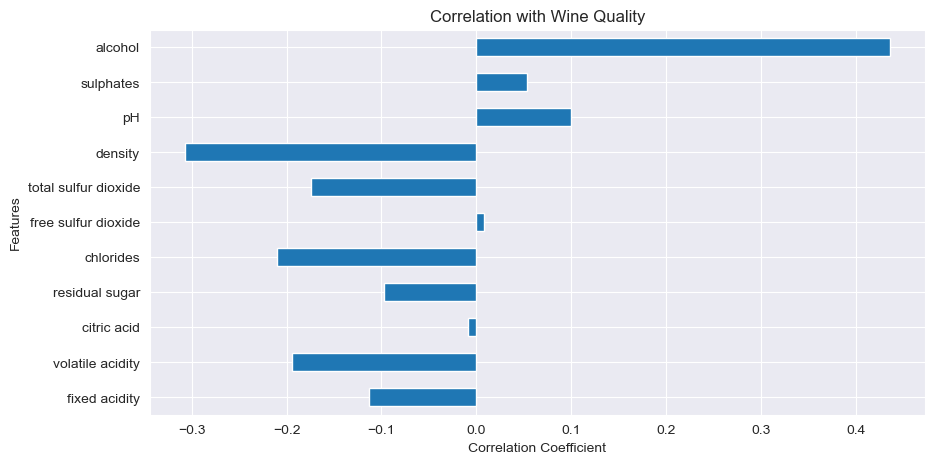

In [10]:
correlation = df_wqw.corr()["quality"].drop("quality")
correlation.plot(kind="barh", figsize=(10, 5), title="Correlation with Wine Quality")
plt.ylabel("Features")
plt.xlabel("Correlation Coefficient")
plt.show()

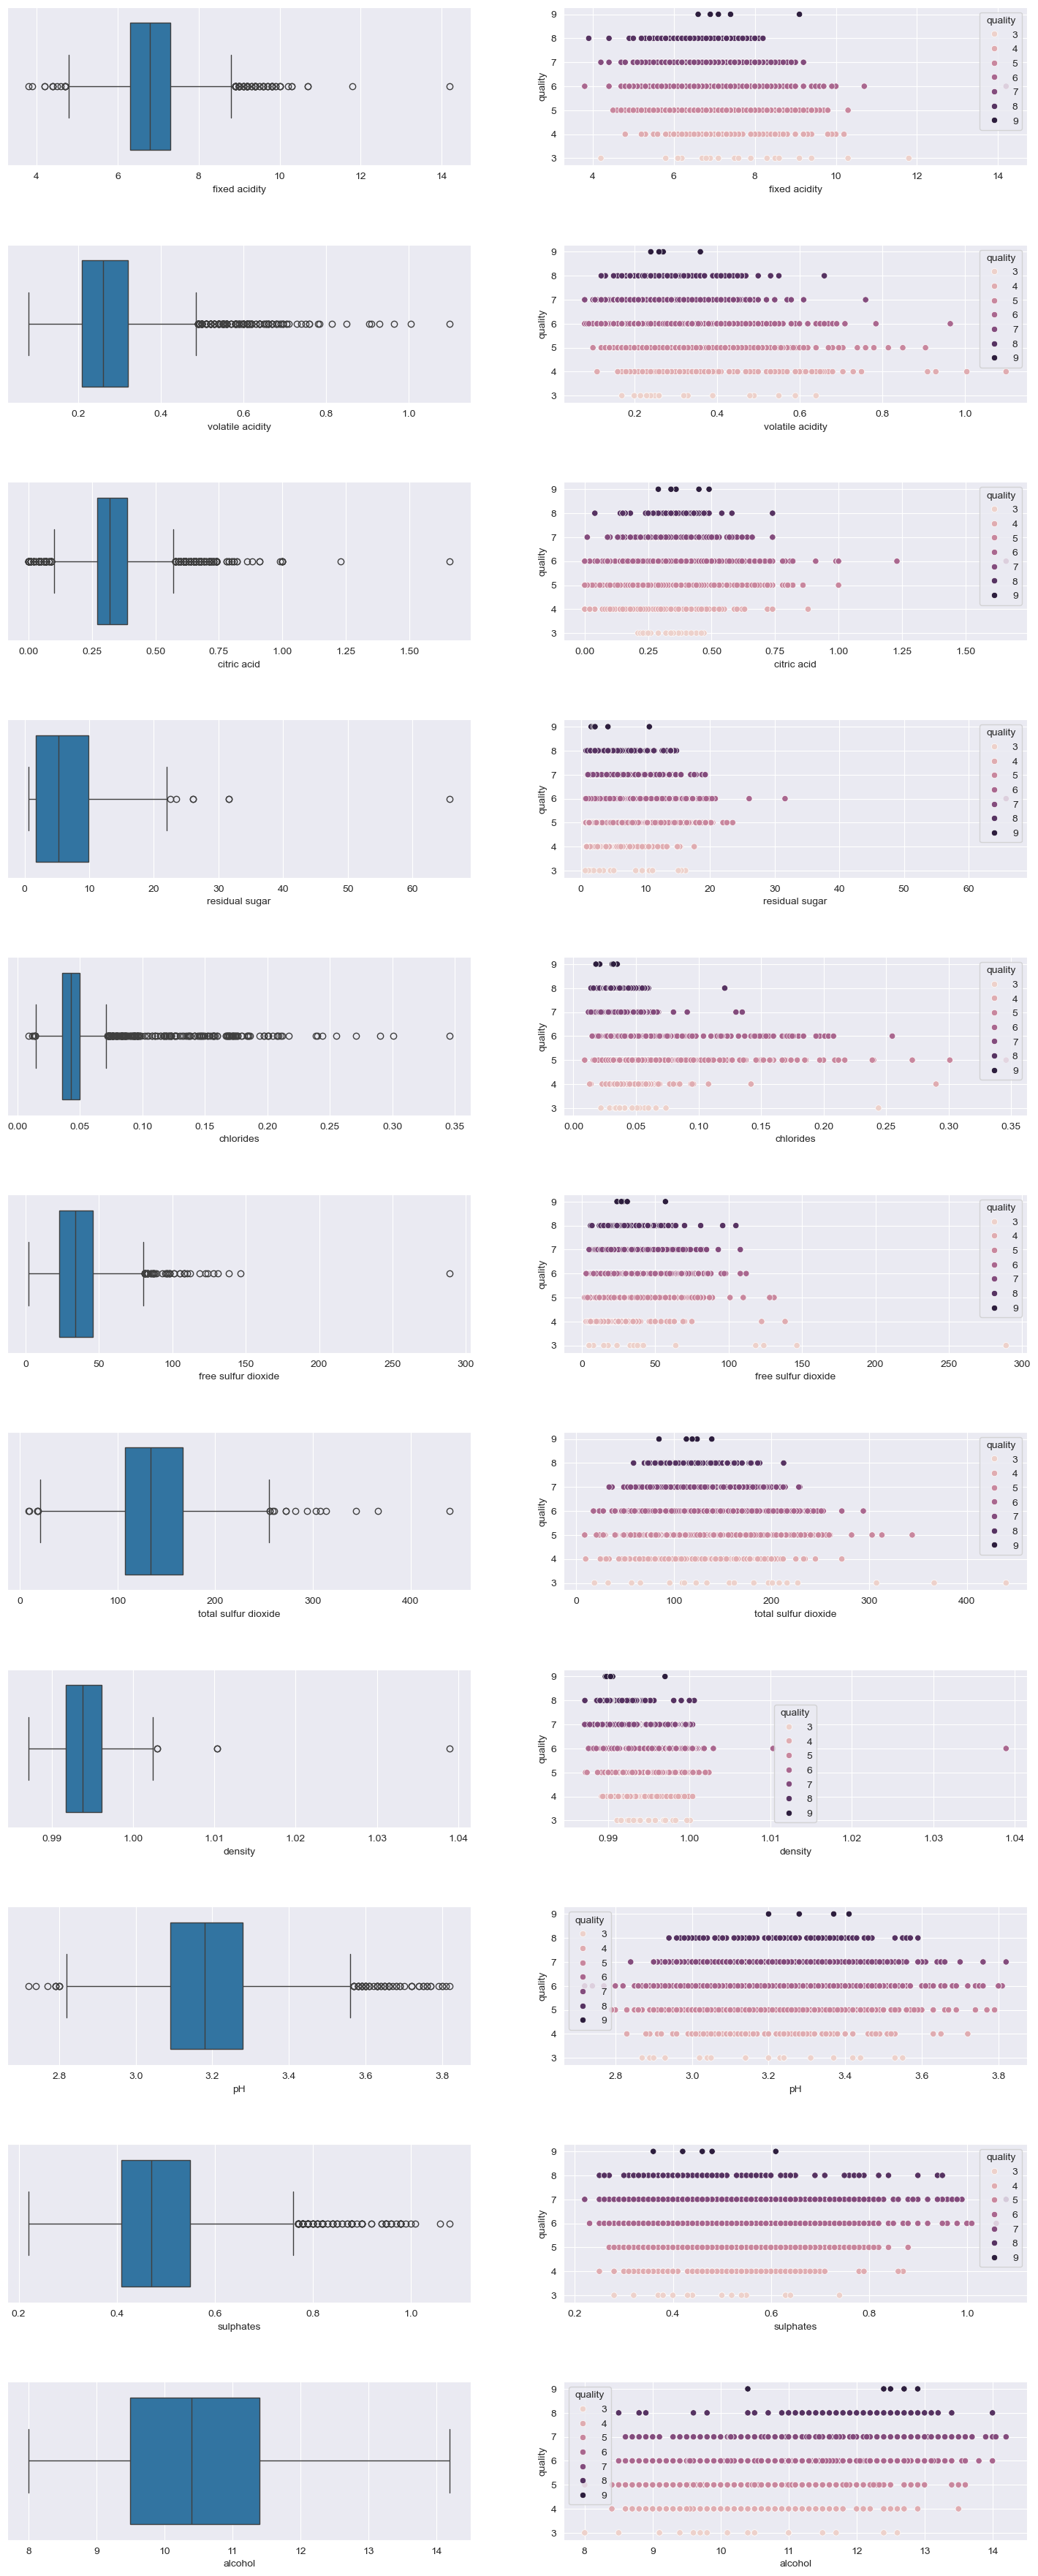

In [11]:
fig, ax = plt.subplots(11,2, figsize=(18,45))
plt.subplots_adjust(hspace=0.5)
for i in range (11):
    #1
    sns.boxplot(x=df_wqw.columns[i], data=df_wqw, ax=ax[i,0])
    #2
    sns.scatterplot(x=df_wqw.columns[i], y=df_wqw["quality"], data = df_wqw, hue="quality", ax=ax[i,1] )
plt.show()

### Data Preprocessing

In [12]:
# Experimentation to see how different the model runs with the numpy format
x_np = df_wqw.loc[:, df_wqw.columns != "quality"].to_numpy()
y_np = df_wqw["quality"].to_numpy()

# No Numpy
x = df_wqw.loc[:,df_wqw.columns != "quality"]
y = df_wqw["quality"]

In [13]:
x_np

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

#### Normalization

In [14]:
# Experimentation with X and y_np_norm
X_np_norm = StandardScaler().fit_transform(x_np)
y_np_norm = StandardScaler().fit_transform(y_np.reshape(-1,1))

# Regular Regularization
X_norm = StandardScaler().fit_transform(x)

# Scaler
scaler_np_norm = MinMaxScaler(feature_range=(0,1)).fit_transform(X_np_norm)
scaler_norm = MinMaxScaler(feature_range=(0,1)).fit_transform(X_norm)
scaler_x = MinMaxScaler(feature_range=(0,1)).fit_transform(x)

X_np_scal = pd.DataFrame(scaler_np_norm, columns=x.columns)
X_scal_norm = pd.DataFrame(scaler_norm, columns = x.columns)
X_scal = pd.DataFrame(scaler_x, columns = x.columns)

#### Comparing Normalization differences

In [15]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[4898 rows x 11 columns]

In [16]:
X_norm

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

In [17]:
X_np_norm

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

##### There is not an actual visible difference between the X being transform into a numpy format and an X not being changed at all

In [18]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [19]:
y_np_norm

array([[0.13787014],
       [0.13787014],
       [0.13787014],
       ...,
       [0.13787014],
       [1.2671142 ],
       [0.13787014]])

#### Split Dataframe

In [25]:
# Applying the Regular Normalization StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)

# Applying the MinMax Scaler()
X_train_sx, X_test_sx, y_train_sx, y_test_sx = train_test_split(X_scal, y, test_size = 0.2, random_state = 42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scal_norm, y, test_size = 0.2, random_state = 42)


#### Parameters

In [27]:
parameters = {
    'penalty': ['l1', 'l2'],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4],
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'fit_intercept': [True, False],
    'intercept_scaling': [1,True, False],
    'class_weight' : ['balanced',None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky', 'sag', 'saga']}

In [24]:
L_R = LogisticRegression()
cv = GridSearchCV(estimator=L_R, param_grid=parameters, cv=10).fit(X_train, y_train)

print(f" Best Hyper Parameters: {cv.best_params_}")
print(f"Accuracy: {cv.best_score_}")

C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which mea

 Best Hyper Parameters: {'C': 1000, 'class_weight': None, 'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.001}
Accuracy: 0.5438971240670181


In [26]:
CV = GridSearchCV(estimator=L_R, param_grid=parameters, cv=10)
cv_sx =CV.fit(X_train_sx,y_train_sx)

print(f"Best Hyper Parameters: {cv_sx.best_params_}")
print(f"Accuracy: {cv_sx.best_score_}")

C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Gio\anaconda3\envs\Simple-Regression-Models\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which mea

Best Hyper Parameters: {'C': 100, 'class_weight': None, 'fit_intercept': False, 'intercept_scaling': 1, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001}
Accuracy: 0.5446656923639022
